<a href="https://colab.research.google.com/github/Ernestug/Earthquake/blob/master/Ocean_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install netcdf4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt


In [ ]:
!wget https://data.nodc.noaa.gov/argo/gadr/data/aoml/4903200/nodc_4903200_prof.nc

--2022-05-30 11:50:10--  https://data.nodc.noaa.gov/argo/gadr/data/aoml/4903200/nodc_4903200_prof.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 205.167.25.172, 205.167.25.178, 205.167.25.168, ...
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/4903200/nodc_4903200_prof.nc [following]
--2022-05-30 11:50:11--  https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/4903200/nodc_4903200_prof.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.172, 205.167.25.168, 205.167.25.171, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2545344 (2.4M) [application/x-netcdf]
Saving to: ‘nodc_4903200_prof.nc’

nodc_4903200_prof.n 100%[===================>]   2.43M  7.25MB/s    in 0.3s    

2022-05-30 11:50:28 (7.25

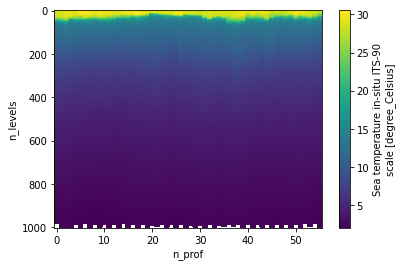

In [ ]:
data = xr.open_dataset('nodc_4903200_prof.nc')
data.temp_adjusted.T.plot()
plt.gca().invert_yaxis()

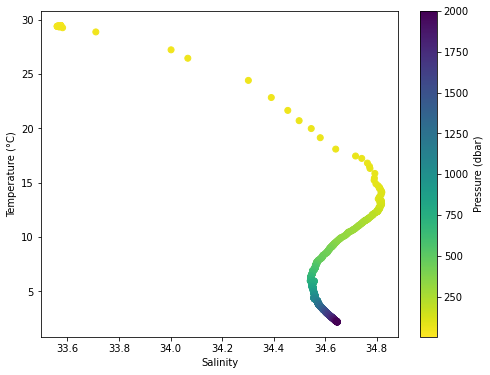

In [ ]:
plt.figure(figsize=(8,6))

nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')

cbh = plt.colorbar();
cbh.set_label('Pressure (dbar)')

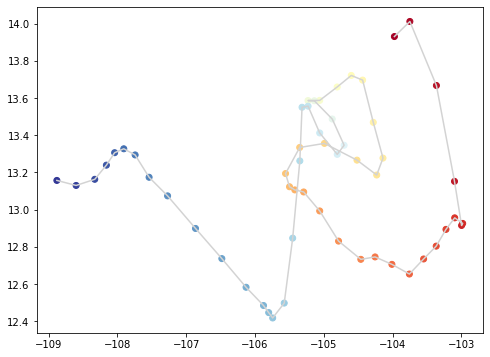

In [ ]:
# Map to show the tracks
plt.figure(figsize=(8,6))
plt.plot(data.longitude, data.latitude, c='lightgrey')
plt.scatter(data.longitude, data.latitude, c=data.juld, cmap='RdYlBu');

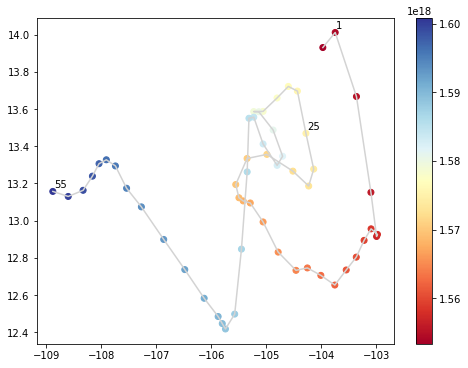

In [ ]:
# Map to show the tracks
plt.figure(figsize=(8,6))
plt.plot(data.longitude, data.latitude, c='lightgrey')
plt.scatter(data.longitude, data.latitude, c=data.juld, cmap='RdYlBu')

# Label the map and add colors
for jj in [1,25,-1]:
  plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)
cbar = plt.colorbar();

In [ ]:
# Import pandas
import pandas as pd 

# We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));